In [9]:
pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.2 MB 1.9 MB/s eta 0:00:25
   - -------------------------------------- 1.2/46.2 MB 14.8 MB/s eta 0:00:04
   -- ------------------------------------- 3.3/46.2 MB 26.5 MB/s eta 0:00:02
   ------ --------------------------------- 7.9/46.2 MB 45.7 MB/s eta 0:00:01
   ----------- ---------------------------- 13.4/46.2 MB 108.8 MB/s eta 0:00:01
   ---------------- ----------------------- 18.9/46.2 MB 131.2 MB/s eta 0:00:01
   --------------------- ------------------ 24.5/46.2 MB 108.8 MB/s eta 0:00:01
   --------------------- ------------------ 25.4/46.2 MB 81.8 MB/s eta 0:00:01
   --------------------- ------------------ 25.4/46.2 MB 81.8 MB/s eta 0:00:01
   ---------------------- ----------------- 25.5/46.2 MB 46.7 MB/s eta 0:00:01
   ---------------------- ----------------- 25.5/46.2 MB 40.9 MB/s eta 0:00:01
   ---------------------- ----------------- 25.7/46.2 MB 36.3 M

In [73]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np # type: ignore
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [85]:
# Cargar imagen
img = cv.imread("test_blue.png")
# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (100, 278, 3) pix
[[[168 105 139]
  [172 111 144]
  [172 111 144]
  ...
  [150  98 127]
  [149  96 125]
  [155 105 133]]

 [[170 109 142]
  [174 115 147]
  [174 115 147]
  ...
  [153 102 130]
  [151 100 128]
  [158 109 136]]

 [[170 109 142]
  [174 115 147]
  [174 115 147]
  ...
  [153 102 130]
  [151 100 128]
  [158 109 136]]

 ...

 [[180 126 152]
  [184 128 155]
  [186 127 155]
  ...
  [  8   4   5]
  [  4   0   1]
  [ 19  16  16]]

 [[183 127 153]
  [184 129 156]
  [190 131 159]
  ...
  [  6   2   3]
  [  3   0   0]
  [ 18  14  15]]

 [[183 128 154]
  [185 130 157]
  [190 132 160]
  ...
  [  9   5   6]
  [  5   1   2]
  [ 20  16  17]]]


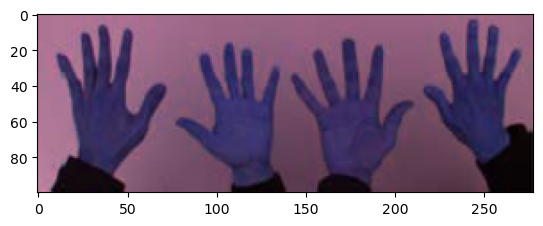

In [87]:
# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img)
plt.show()

In [89]:
def white_patch(img):
    # Paso 1: Convertir a float para evitar errores de desbordamiento
    #img_float = img.copy()

    # Paso 2: Calcular el valor máximo de cada canal (R, G, B)
    R_max = np.max(img[:, :, 0])  # Canal Rojo
    G_max = np.max(img[:, :, 1])  # Canal Verde
    B_max = np.max(img[:, :, 2])  # Canal Azul

    # Crear el vector [R, G, B] de máximos
    max_rgb = np.array([R_max, G_max, B_max])
    print("Vector [R, G, B] (valores máximos):", max_rgb)

    # Paso 3: Calcular el vector de escala
    scale = 255.0 / max_rgb
    print("Vector scale [s_R, s_G, s_B]:", scale)

    # Paso 4: Aplicar la corrección a cada canal por separado
    corrected = np.zeros_like(img)
    for c in range(3):
        corrected[:, :, c] = np.clip(img[:, :, c] * scale[c], 0, 255)

    # Paso 5: Convertir a uint8 para visualizar o guardar
    corrected_uint8 = corrected.astype(np.uint8)
    return corrected_uint8

In [91]:
# Aplicar algoritmo White Patch
img_wp = white_patch(img)

Vector [R, G, B] (valores máximos): [200 138 165]
Vector scale [s_R, s_G, s_B]: [1.275      1.84782609 1.54545455]


In [ ]:
# Mostrar imagen corregida
cv.imshow("White Patch aplicado", img_wp)
cv.waitKey(0)
cv.destroyAllWindows()